# 대표적인 이산형 확률분포

In [1]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import bernoulli
import seaborn as sns

%precision 3
%matplotlib inline

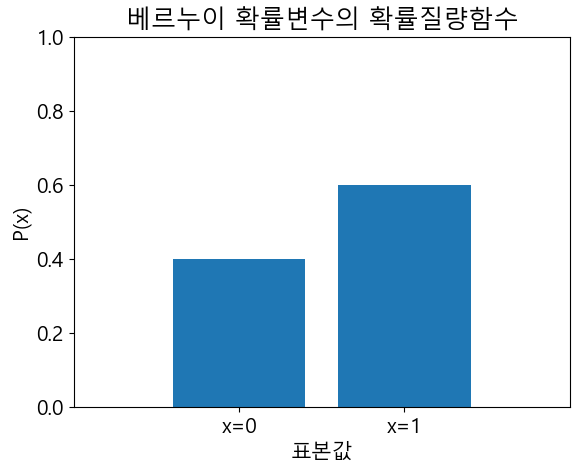

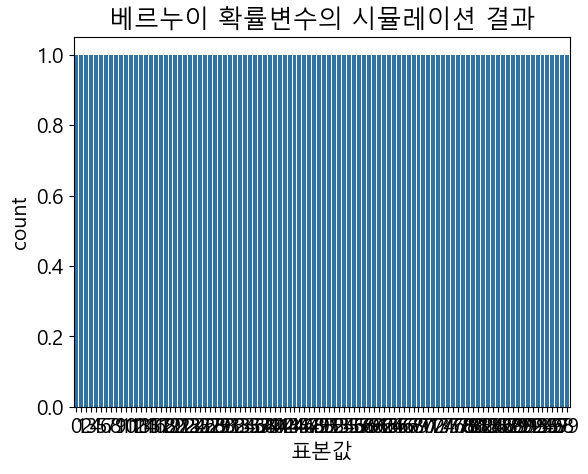

In [3]:
mu = 0.6
rv = bernoulli(mu)
type(rv)

xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

x = rv.rvs(100, random_state=0)
x
sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()


In [4]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

## 베르누이 분포

In [5]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [6]:
p = 0.3
X = Bern(p)

In [7]:
check_prob(X)

expected value 0.3
variance 0.21


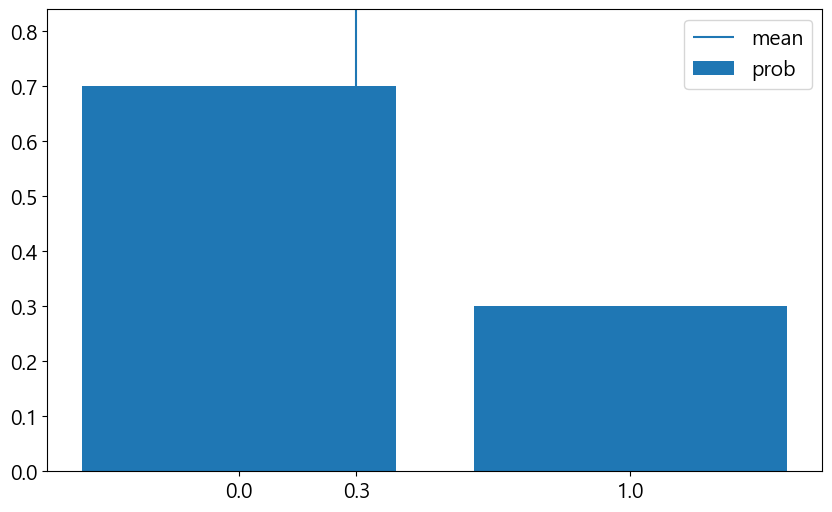

In [8]:
plot_prob(X)

In [9]:
rv = stats.bernoulli(p)

In [10]:
rv.pmf(0), rv.pmf(1)

(0.700, 0.300)

In [11]:
rv.pmf([0, 1])

array([0.7, 0.3])

In [12]:
rv.cdf([0, 1])

array([0.7, 1. ])

In [13]:
rv.mean(), rv.var()

(0.300, 0.210)

## 이항분포

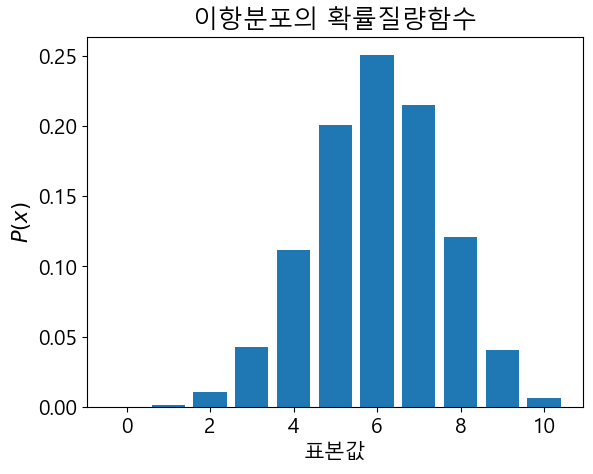

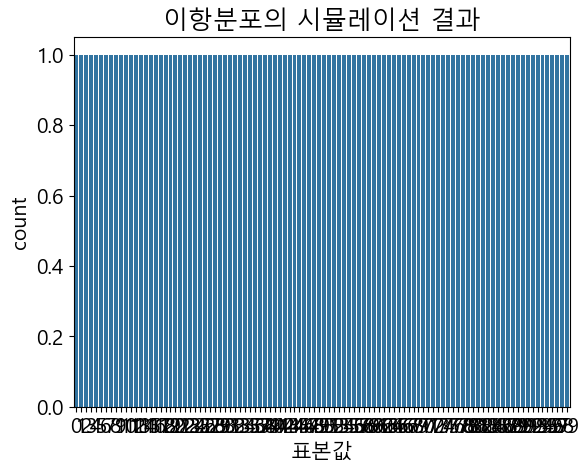

In [63]:
from scipy import stats
import numpy as np

np.mean(x)

np.var(x, ddof=1)

s = stats.describe(x)
s[2], s[3]

N = 10
mu = 0.6
rv = stats.binom(N, mu)

xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 확률질량함수")
plt.show()

np.random.seed(0)
x = rv.rvs(100)
x

sns.countplot(x)
plt.title("이항분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

In [14]:
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [15]:
n = 10
p = 0.3
X = Bin(n, p)

In [16]:
check_prob(X)

expected value 3.0
variance 2.1


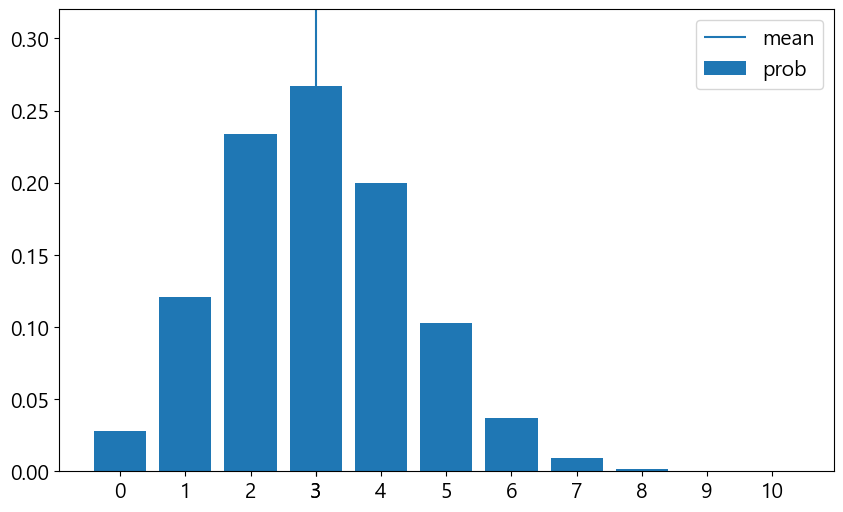

In [17]:
plot_prob(X)

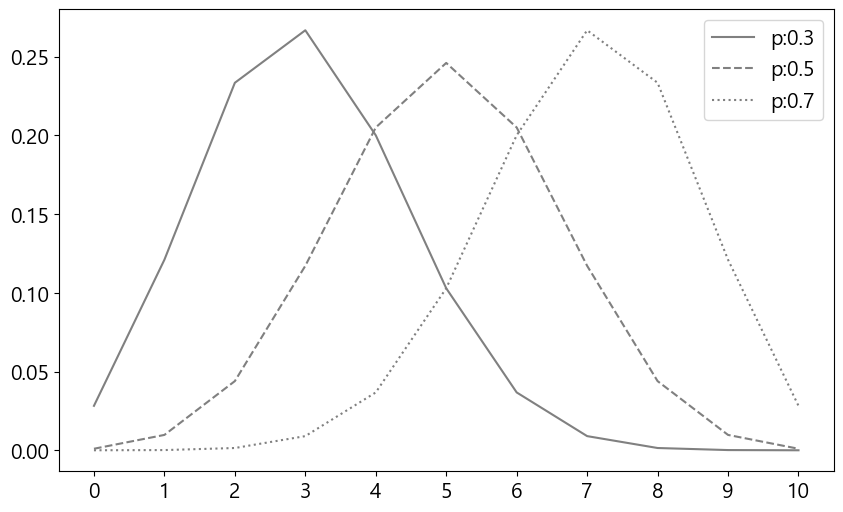

In [18]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

## 기하분포

In [19]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [20]:
p = 0.5
X = Ge(p)

In [21]:
check_prob(X)

expected value 2.0
variance 2.0


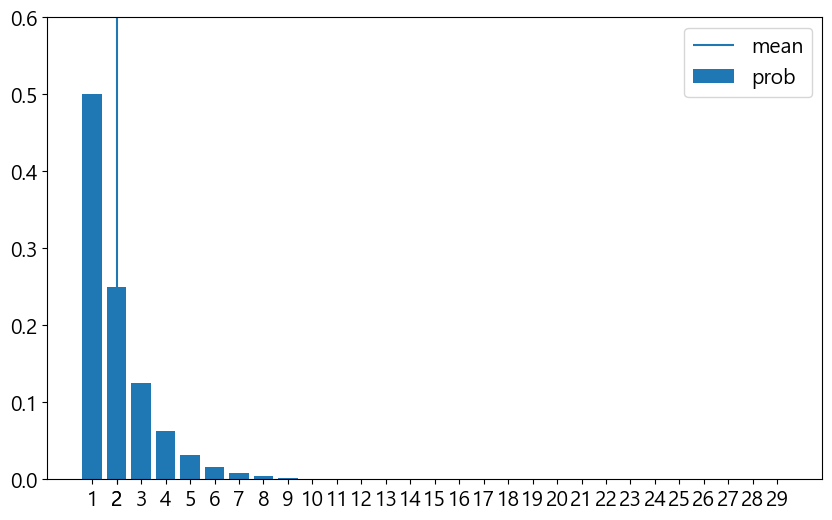

In [22]:
plot_prob(X)

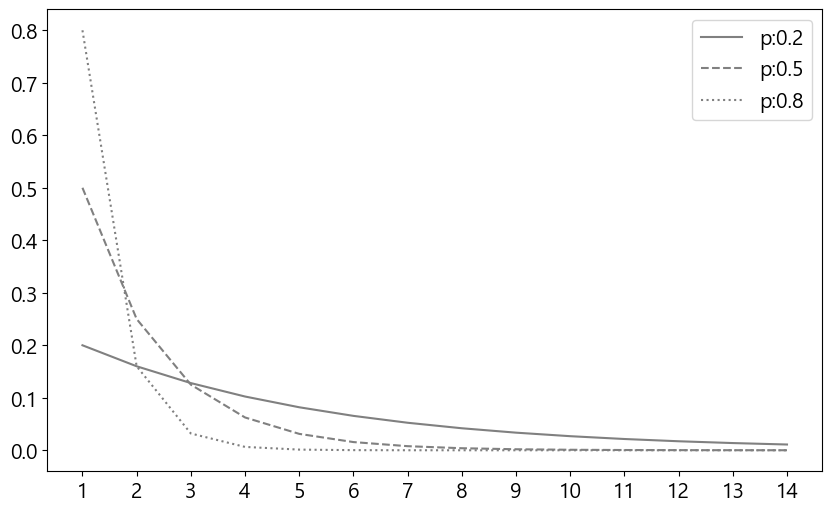

In [23]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

## 포아송 분포

In [24]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [25]:
lam = 3
X = Poi(lam)

In [26]:
check_prob(X)

expected value 3.0
variance 3.0


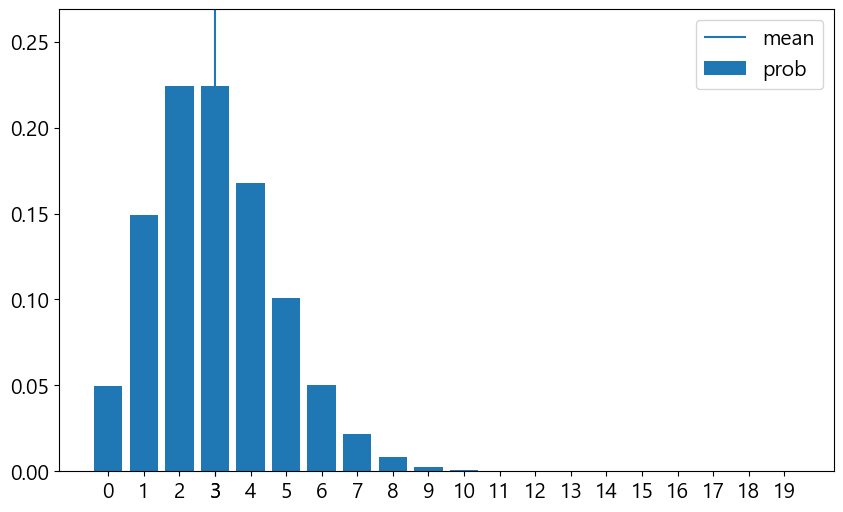

In [27]:
plot_prob(X)

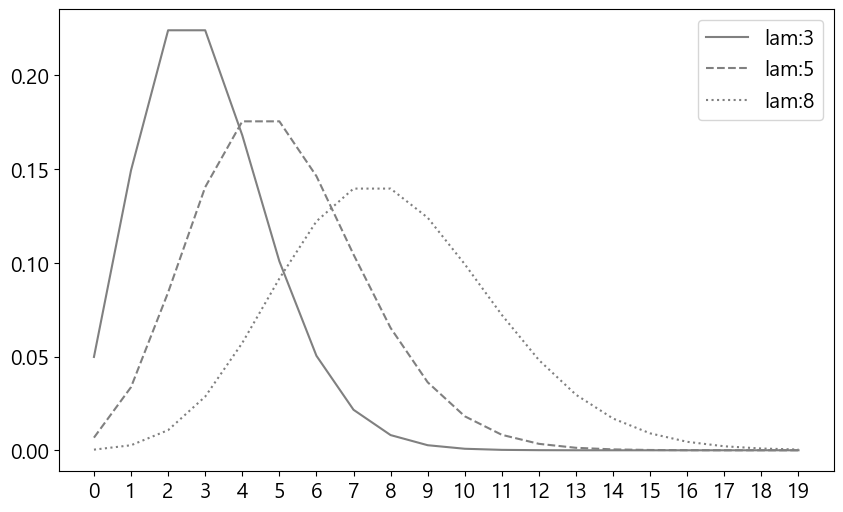

In [28]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

### Question 1

In [64]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 8 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

def plot_bernoulli(mu, M):
    rv = bernoulli(mu)
    x = rv.rvs(M, random_state=0)
    y = np.bincount(x, minlength=2) / float(len(x))
    xx = [0,1]
    df = pd.DataFrame({'이론':rv.pmf(xx), '시뮬레이션': y})
    df.index =[0,1]
    df2 = df.stack().reset_index()
    df2.columns = ['표본값', '유형', '비율']
    sns.barplot(x='표본값', y='비율', hue='유형', data=df2)
    plt.title('$\mu$={}, 표본계수={}'.format(mu, M))

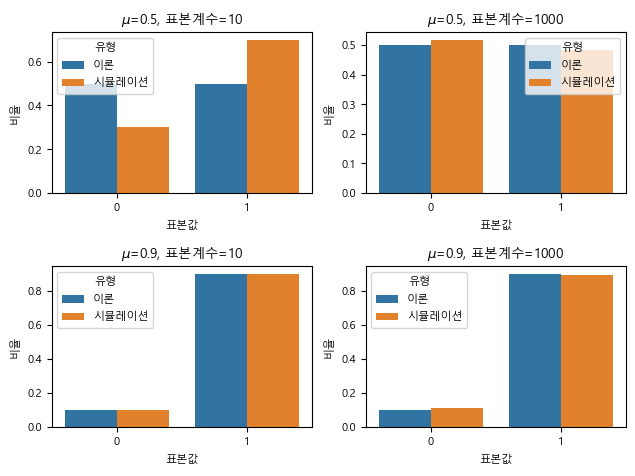

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import bernoulli

plt.subplot(221)
plot_bernoulli(0.5, 10)
plt.subplot(222)
plot_bernoulli(0.5, 1000)
plt.subplot(223)
plot_bernoulli(0.9, 10)
plt.subplot(224)
plot_bernoulli(0.9, 1000)
plt.tight_layout()
plt.show()

# 대표적인 연속형 확률분포

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [30]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

In [31]:
## 정규분포

In [32]:
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [33]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [34]:
check_prob(X)

expected vaue 2.000
variance 0.250


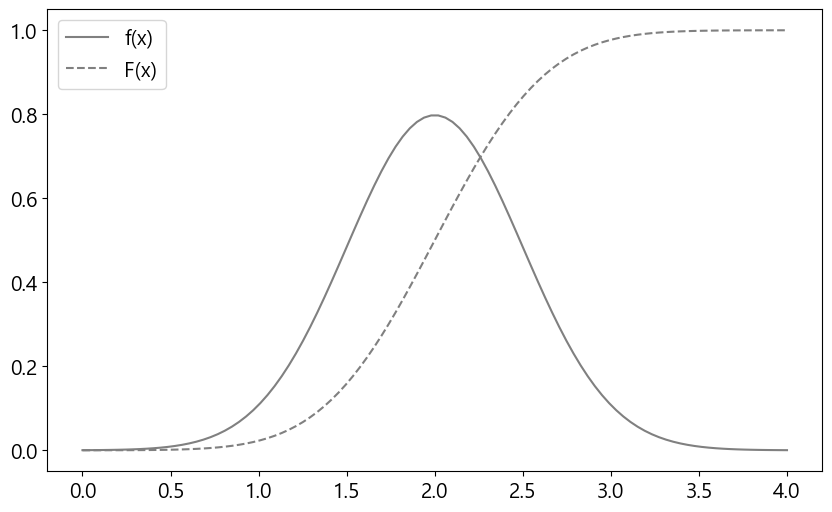

In [35]:
plot_prob(X, 0, 4)

In [36]:
rv = stats.norm(2, 0.5)

In [37]:
rv.mean(), rv.var()

(2.000, 0.250)

In [38]:
rv.pdf(2)

0.798

In [39]:
rv.cdf(1.7)

0.274

In [40]:
rv.isf(0.3)

2.262

In [41]:
rv.interval(0.9)

(1.178, 2.822)

In [42]:
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

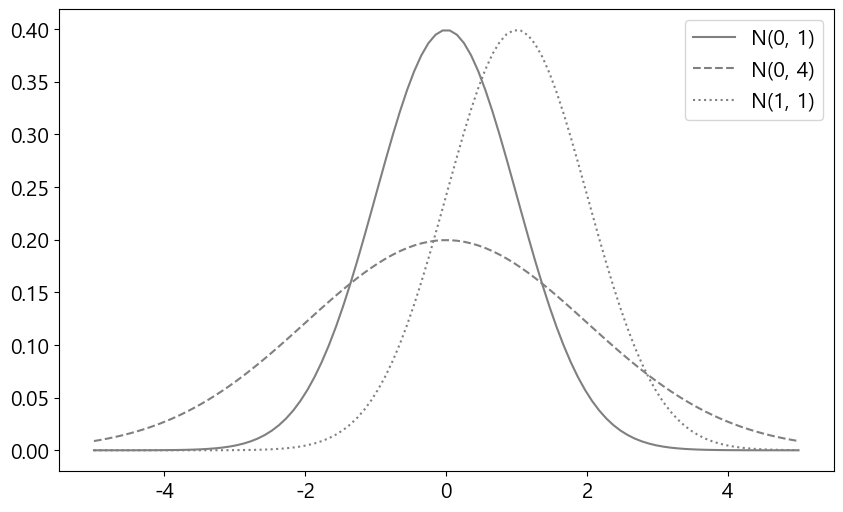

In [43]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

## 지수분포

In [44]:
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

In [45]:
lam = 3
X = Ex(lam)

In [46]:
check_prob(X)

expected vaue 0.333
variance 0.111


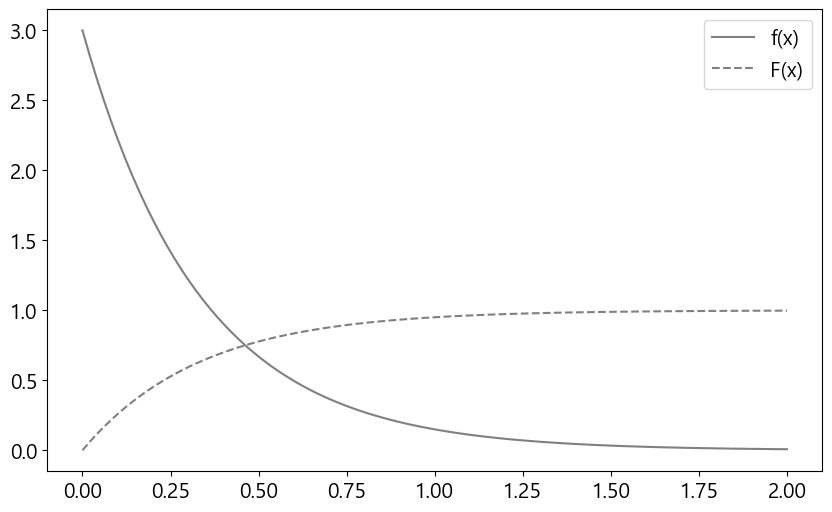

In [47]:
plot_prob(X, 0, 2)

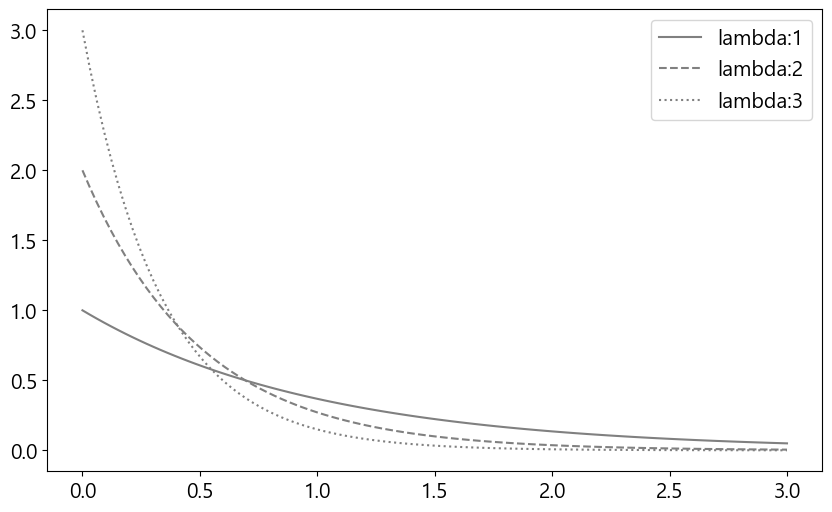

In [48]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs),
            label=f'lambda:{lam}', ls=ls, color='gray')
ax.legend()

plt.show()

## 카이제곱분포

In [49]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
# 표준정규분포로부터 10×100만 사이즈로 무작위추출
Zs_sample = rv.rvs((n, sample_size))
# axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구한다
chi2_sample = np.sum(Zs_sample**2, axis=0)

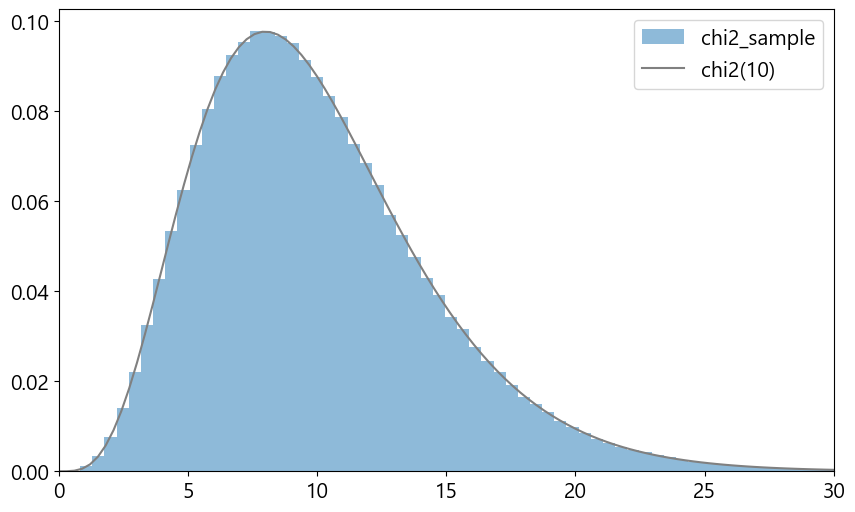

In [50]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

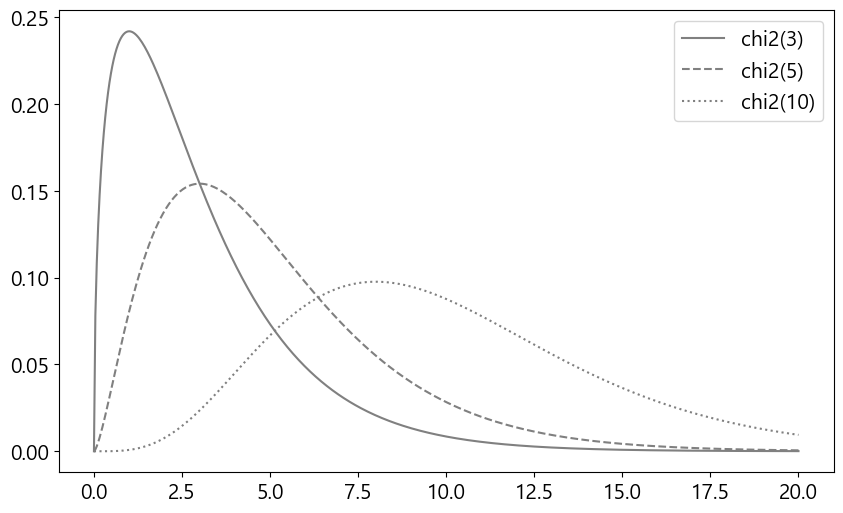

In [51]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

In [52]:
rv = stats.chi2(5)
rv.isf(0.05)

11.070

## t분포

In [53]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

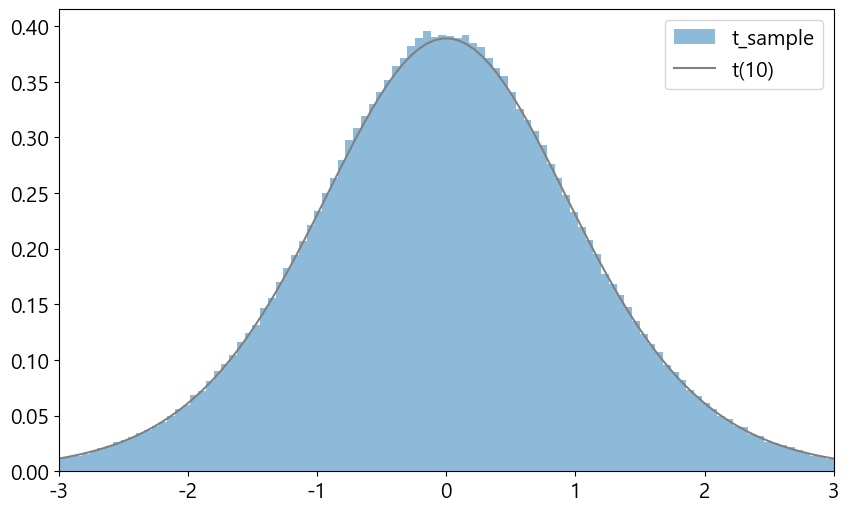

In [54]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

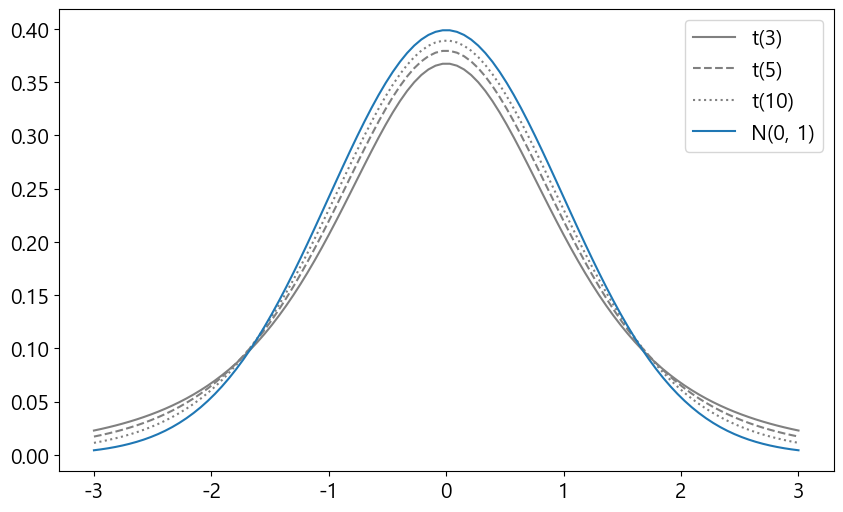

In [55]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='gray')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
    
ax.legend()
plt.show()

In [56]:
rv = stats.t(5)
rv.isf(0.05)

2.015

## F분포

In [57]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

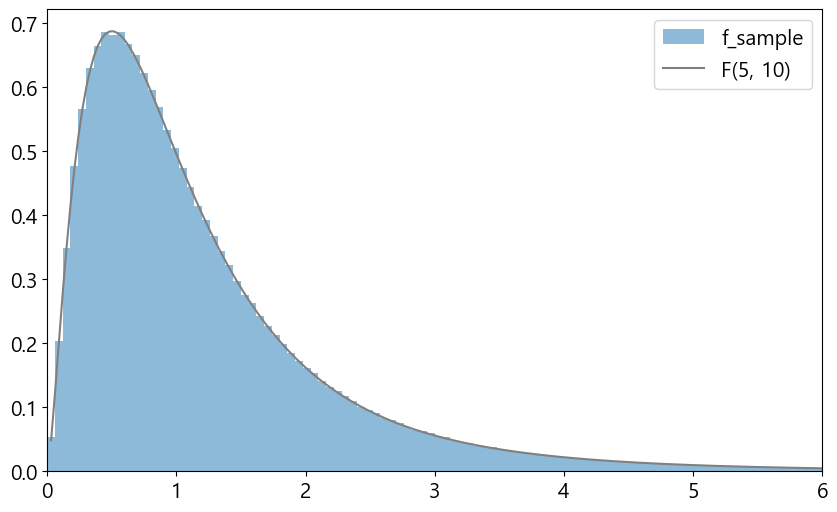

In [58]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)
xs = np.linspace(0, 6, 200)[1:]
ax.hist(f_sample, bins=100, range=(0, 6),
        density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

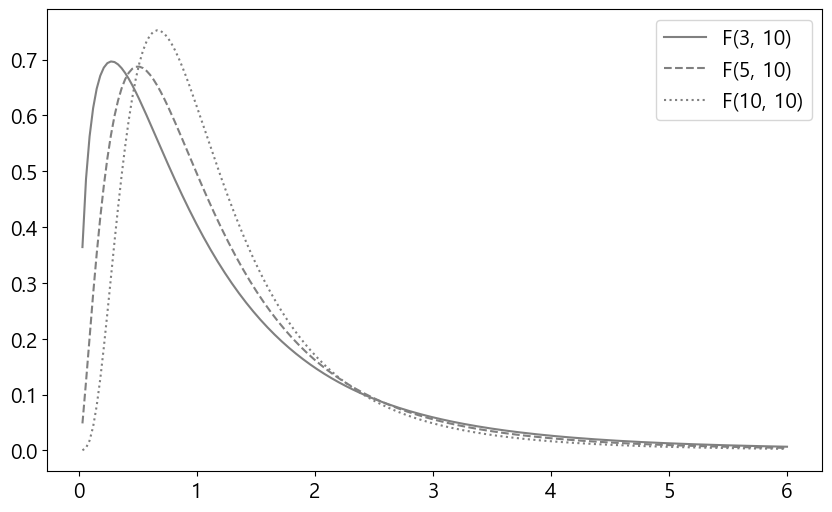

In [59]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
            label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend()
plt.show()

### Question 1

C:\Users\k8s\AppData\Local\Temp\ipykernel_2348\3954904040.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t, kde=False)
C:\Users\k8s\AppData\Local\Temp\ipykernel_2348\3954904040.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t, kde=False)


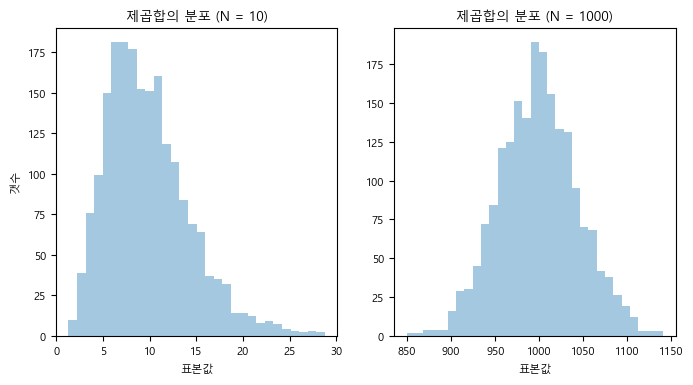

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sp

# np.random.seed(0)으로 수정
np.random.seed(0)

rv = sp.norm()
M = 2000

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
N = 10
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.title("제곱합의 분포 (N = 10)")
plt.xlabel("표본값")
plt.ylabel("갯수")

plt.subplot(1, 2, 2)
N = 1000
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.title("제곱합의 분포 (N = 1000)")
plt.xlabel("표본값")

plt.show()

### Question 2

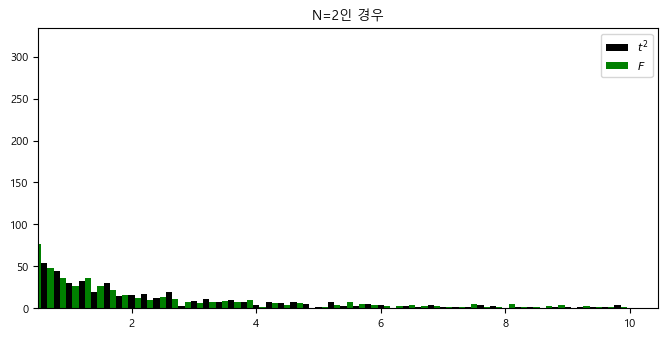

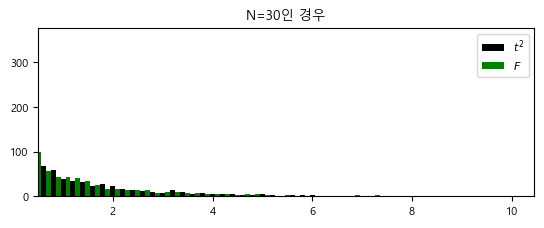

<Figure size 640x480 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, f

def plot_t_f(N):
    np.random.seed(0)
    t2 = t(df=N).rvs(1000) ** 2
    f_value = f(1, N).rvs(1000)
    plt.hist(t2, bins=50, range=(0, 10), rwidth=0.5, align='left', color='k', label='$t^2$')
    plt.hist(f_value, bins=50, range=(0, 10), rwidth=0.5, align='mid', color='g', label='$F$')
    plt.xlim(0.5)
    plt.legend()
    plt.title('N={}인 경우'.format(N))
    plt.show()

plt.figure(figsize=(8, 8))

plt.subplot(211)
plot_t_f(2)

plt.subplot(212)
plot_t_f(30)

plt.tight_layout()  # 그래프 간격 조정
plt.show()